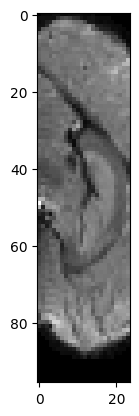

In [2]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from yucca.modules.data.augmentation.transforms.cropping_and_padding import CropPad
from nibabel.testing import data_path

# We use a publicly available sample from Nibabel
example_file = os.path.join(data_path, "example4d.nii.gz")

im = nib.load(example_file)
imarr = im.get_fdata()[:, :, :, 0]
plt.imshow(imarr[64, :, :], cmap="gray")

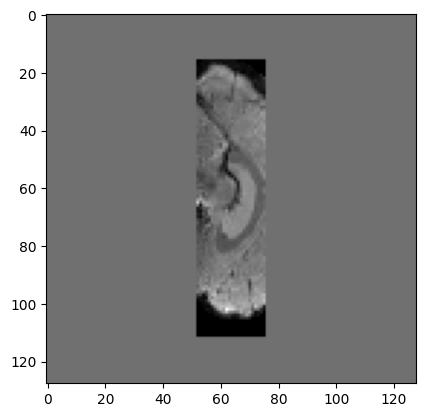

In [3]:
# First show padding with a specified (and very large) value
croppad = CropPad(patch_size=(132, 128, 128), pad_value=500.0)
imarr_cropped = croppad({"image": imarr[np.newaxis], "label": None}, image_properties={"foreground_locations": []})
plt.imshow(imarr_cropped["image"][0, 64, :, :], cmap="gray")

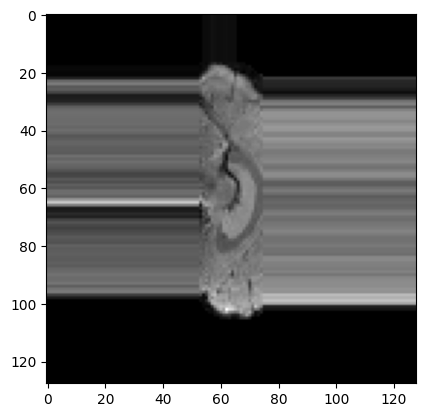

In [4]:
# Show edge padding and its potentially undesirable effects
croppad = CropPad(patch_size=(132, 128, 128), pad_value="edge")
imarr_cropped = croppad({"image": imarr[np.newaxis], "label": None}, image_properties={"foreground_locations": []})
plt.imshow(imarr_cropped["image"][0, 64, :, :], cmap="gray")

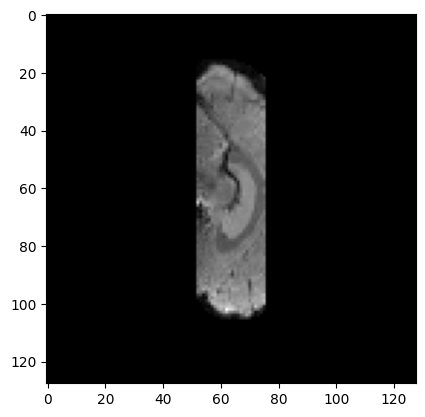

In [5]:
# Show minimum padding. For this we use the absolute minimum value of the array,
# rather than np.pad's "minimum", which is per axis - essentially causing the same artifacts as the "edge" case
croppad = CropPad(patch_size=(132, 128, 128), pad_value="min")
imarr_cropped = croppad({"image": imarr[np.newaxis], "label": None}, image_properties={"foreground_locations": []})
plt.imshow(imarr_cropped["image"][0, 64, :, :], cmap="gray")

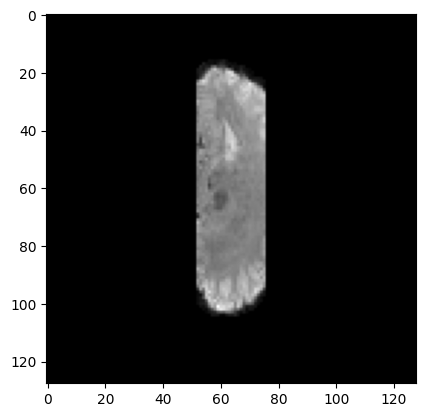

In [6]:
# Show minimum padding for 2D
croppad = CropPad(patch_size=(128, 128), pad_value="min")
imarr_cropped = croppad({"image": imarr[np.newaxis], "label": None}, image_properties={"foreground_locations": []})
plt.imshow(imarr_cropped["image"][0, :, :], cmap="gray")